In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

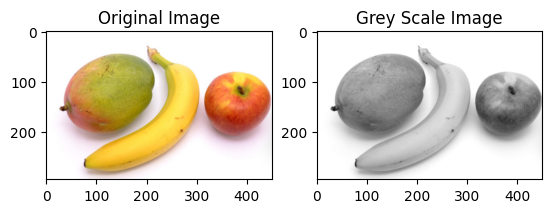

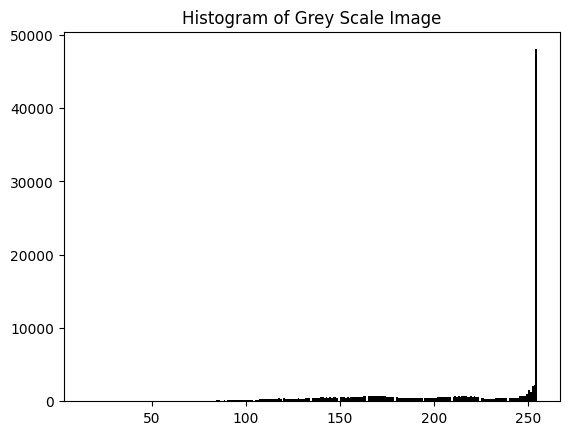

In [65]:
image = cv2.imread('Image 1 - Assign 2.png')

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot original image
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# plot grey scale image
plt.subplot(122)
plt.imshow(image_gray, cmap='gray')
plt.title('Grey Scale Image')
plt.show()

# Plot the histogram of the noisy image
plt.hist(image_gray.ravel(), bins=256, color='black')
plt.title('Histogram of Grey Scale Image')
plt.show()

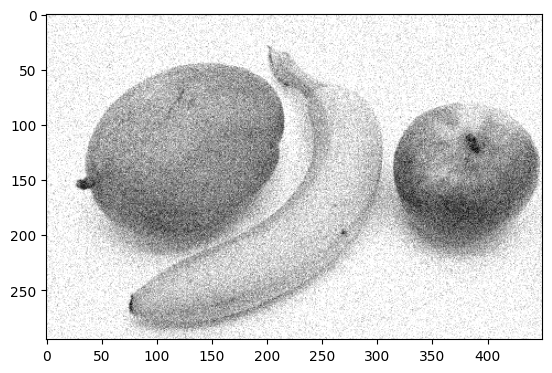

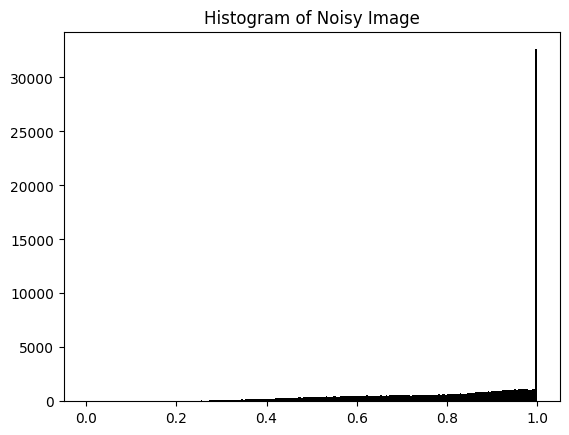

In [66]:
def add_gaussian_noise(image_gray):
    return random_noise(image_gray, mode='gaussian', mean=0, var=0.01)

# Add noise to the image
image_gray_noisy = add_gaussian_noise(image_gray)

# Display the noisy image
plt.imshow(image_gray_noisy, cmap='gray')
plt.show()

# Plot the histogram of the noisy image
plt.hist(image_gray_noisy.ravel(), bins=256, color='black')
plt.title('Histogram of Noisy Image')
plt.show()




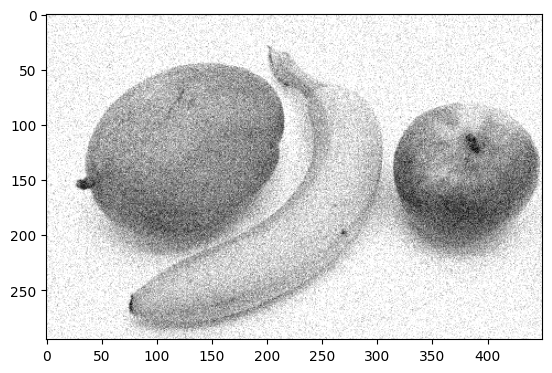

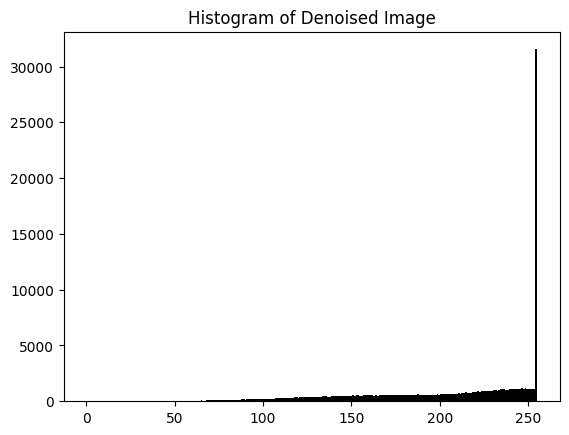

In [67]:
def remove_noise(image):
    return cv2.fastNlMeansDenoising((image * 255).astype(np.uint8))


# Remove noise from the image
image_gray_denoised = remove_noise(image_gray_noisy)

# Display the denoised image
plt.imshow(image_gray_denoised, cmap='gray')
plt.show()

# Plot the histogram of the denoised image
plt.hist(image_gray_denoised.ravel(), bins=256, color='black')
plt.title('Histogram of Denoised Image')
plt.show()

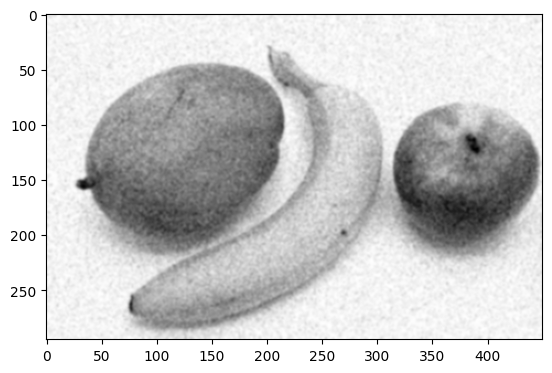

In [68]:
# Apply Gaussian blur to remove noise
blurred_image = cv2.GaussianBlur(image_gray_noisy, (5, 5), 0)
# Display the denoised image
plt.imshow(blurred_image, cmap='gray')
plt.show()

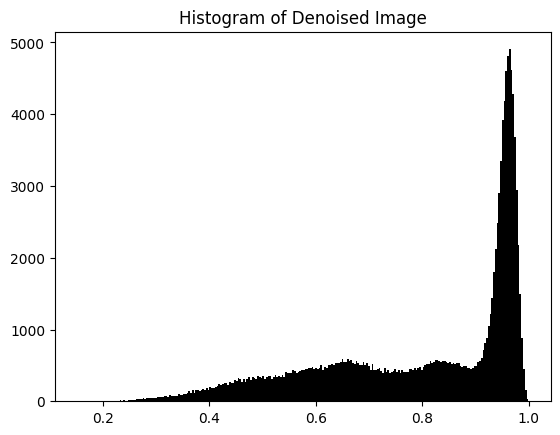

In [69]:
plt.hist(blurred_image.ravel(), bins=256, color='black')
plt.title('Histogram of Denoised Image')
plt.show()

In [70]:
# Calculate the difference between the noisy and denoised images
noise_removed = image_gray_noisy - image_gray_denoised / 255

# Calculate the total amount of noise removed
total_noise_removed = np.sum(noise_removed)

print(f'Total amount of noise removed: {total_noise_removed}')

Total amount of noise removed: 198.42913613897215


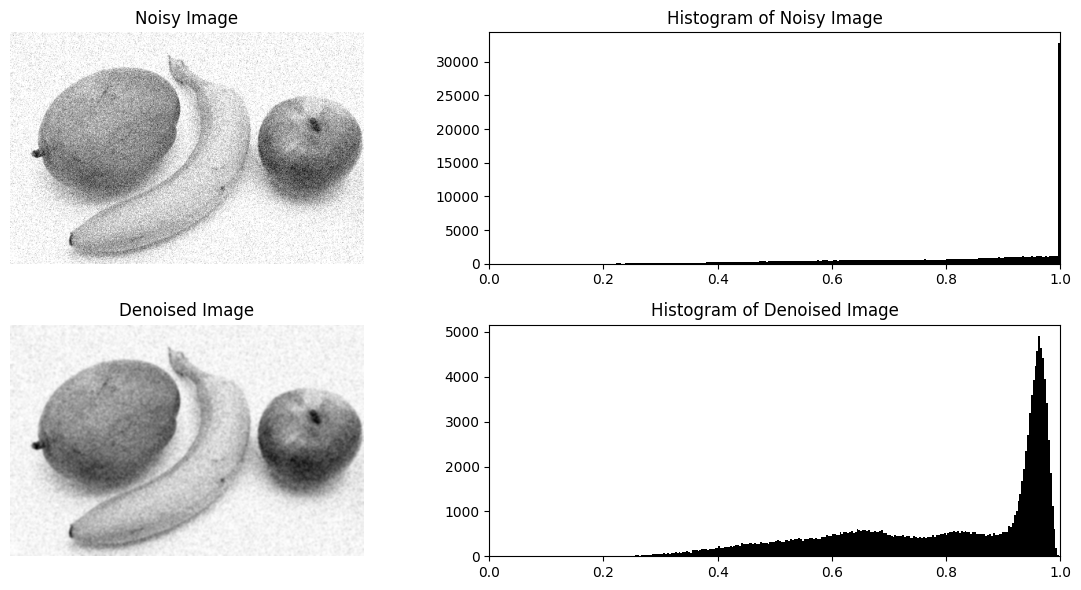

In [72]:


def add_gaussian_noise(image_gray):
    return random_noise(image_gray, mode='gaussian', mean=0, var=0.01)

# Add noise to the image
image_gray_noisy = add_gaussian_noise(image_gray)

# Remove noise using Gaussian blur
image_gray_denoised = cv2.GaussianBlur(image_gray_noisy, (5, 5), 0)

# Display the original noisy image, denoised image, and their histograms
plt.figure(figsize=(12, 6))

# Original noisy image
plt.subplot(2, 2, 1)
plt.imshow(image_gray_noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Histogram of the noisy image
plt.subplot(2, 2, 2)
plt.hist(image_gray_noisy.ravel(), bins=256, color='black')
plt.title('Histogram of Noisy Image')
plt.xlim([0, 1])

# Denoised image
plt.subplot(2, 2, 3)
plt.imshow(image_gray_denoised, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

# Histogram of the denoised image
plt.subplot(2, 2, 4)
plt.hist(image_gray_denoised.ravel(), bins=256, color='black')
plt.title('Histogram of Denoised Image')
plt.xlim([0, 1])

plt.tight_layout()
plt.show()


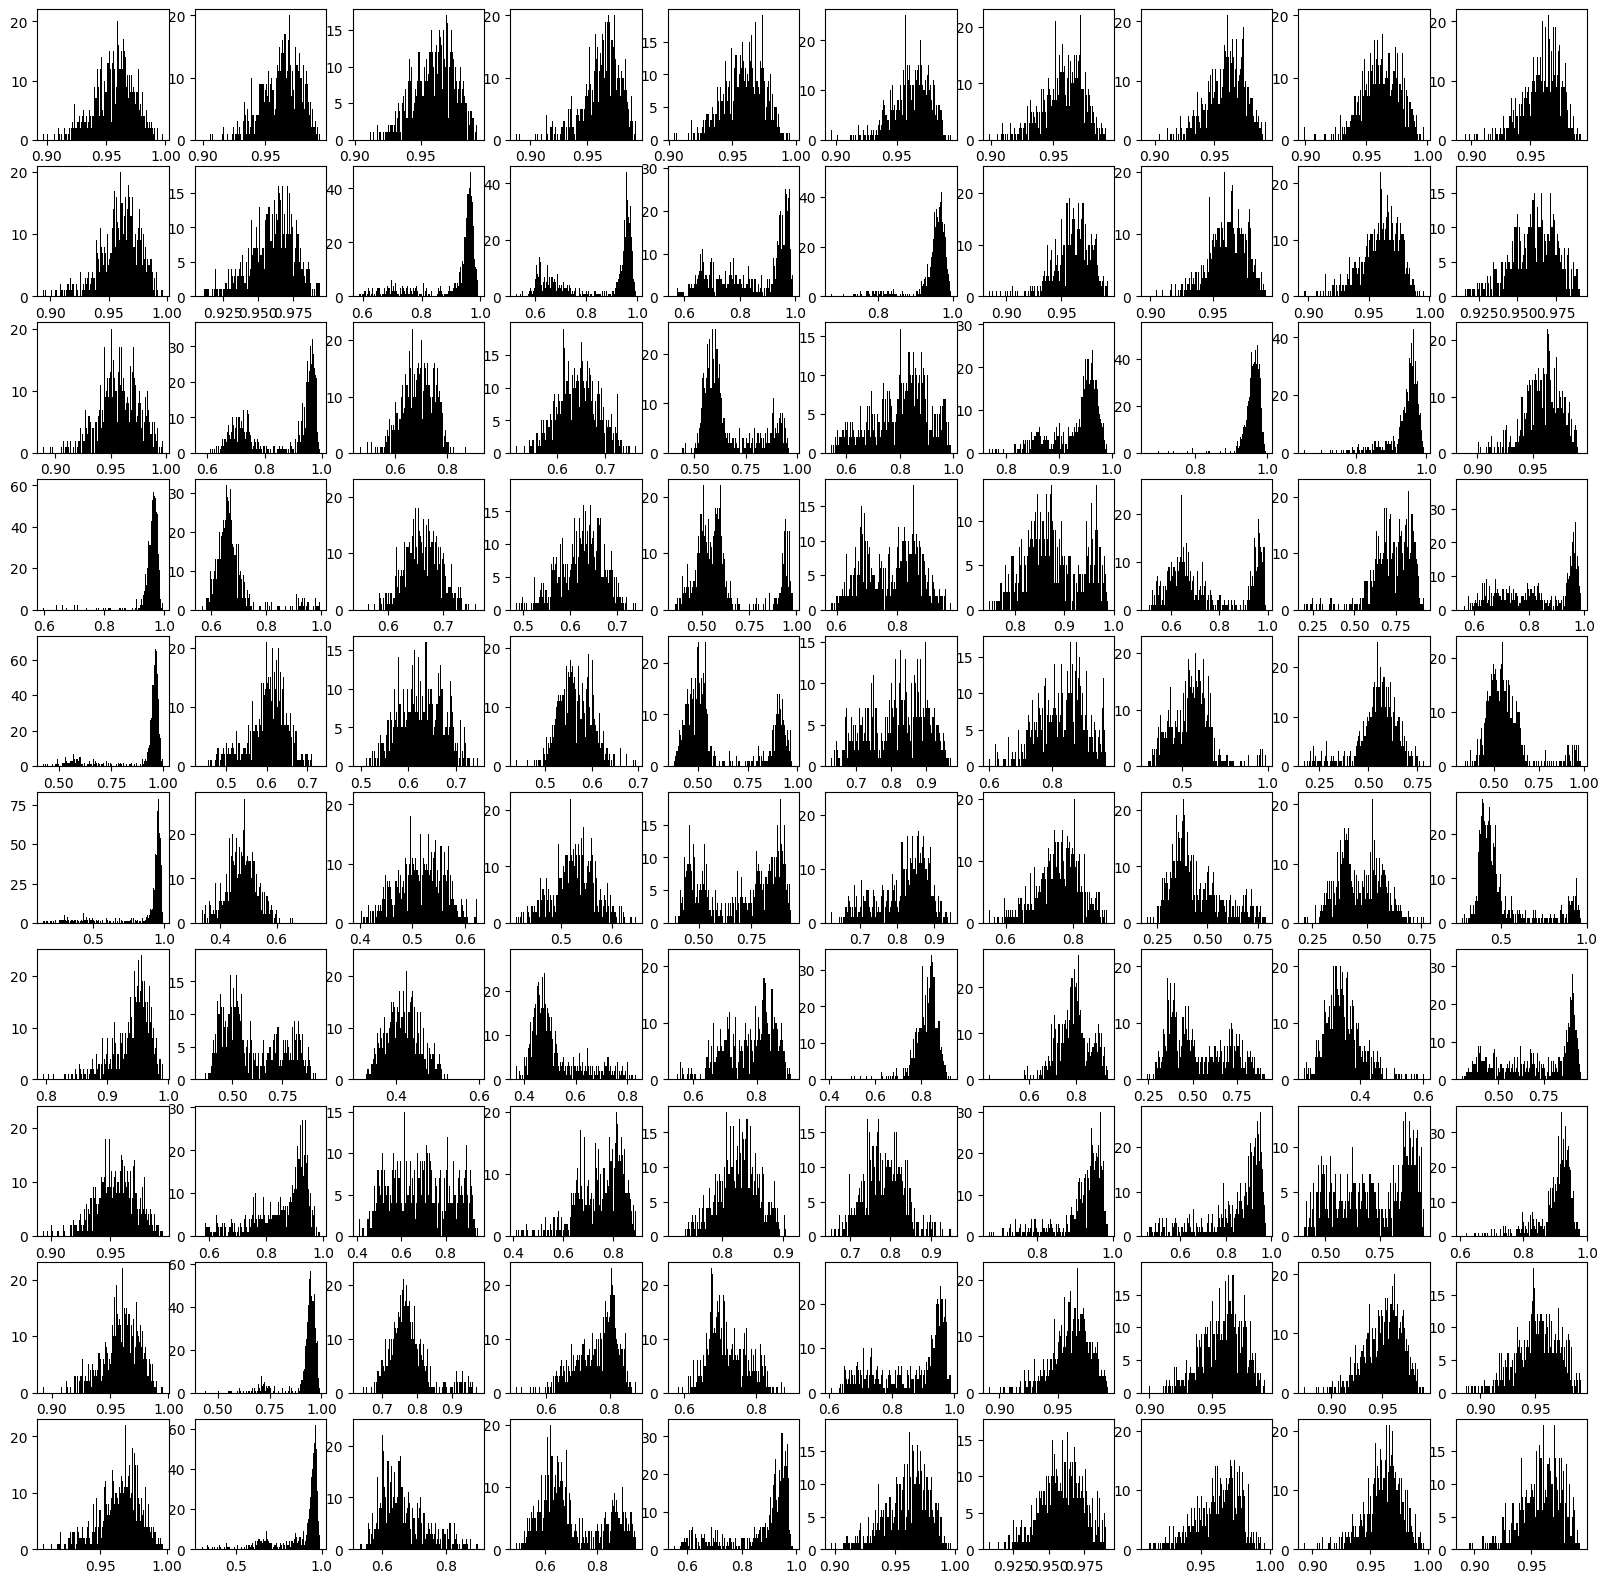

In [74]:
# Define the grid size for dividing the image into sub-images
grid_size = (10, 10)

# Calculate the size of each sub-image
sub_image_size = (image_gray_denoised.shape[0] // grid_size[0], image_gray_denoised.shape[1] // grid_size[1])

# Create a figure for the histograms
plt.figure(figsize=(20, 20))

# Loop over the grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Extract the sub-image
        sub_image = image_gray_denoised[i*sub_image_size[0]:(i+1)*sub_image_size[0], j*sub_image_size[1]:(j+1)*sub_image_size[1]]
        
        # Create a subplot for the histogram
        plt.subplot(grid_size[0], grid_size[1], i*grid_size[0] + j + 1)
        
        # Plot the histogram of the sub-image
        plt.hist(sub_image.ravel(), bins=256, color='black')

# Display the histograms
plt.show()

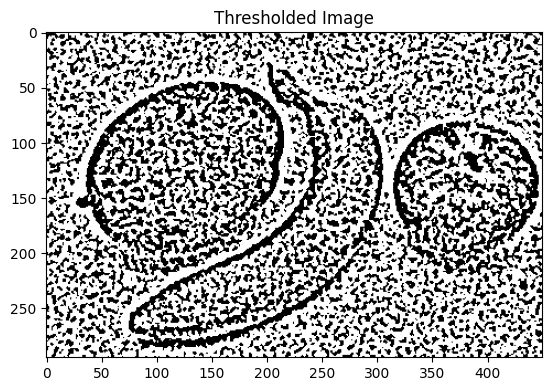

In [59]:
def adaptive_threshold(image, block_size, C):
    return cv2.adaptiveThreshold((image * 255).astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)

# Apply adaptive thresholding to the denoised image
block_size, C = 11, 2  # Block size must be an odd number
image_gray_thresholded = adaptive_threshold(image_gray_denoised, block_size, C)

# Display the thresholded image
plt.imshow(image_gray_thresholded, cmap='gray')
plt.title('Thresholded Image')
plt.show()

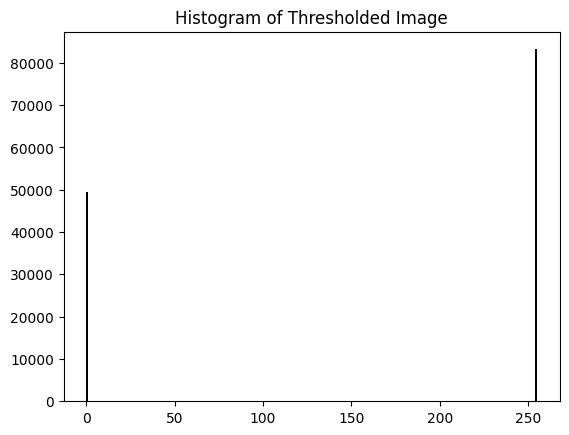

In [60]:
# Plot the histogram of the thresholded image
plt.hist(image_gray_thresholded.ravel(), bins=256, color='black')
plt.title('Histogram of Thresholded Image')
plt.show()

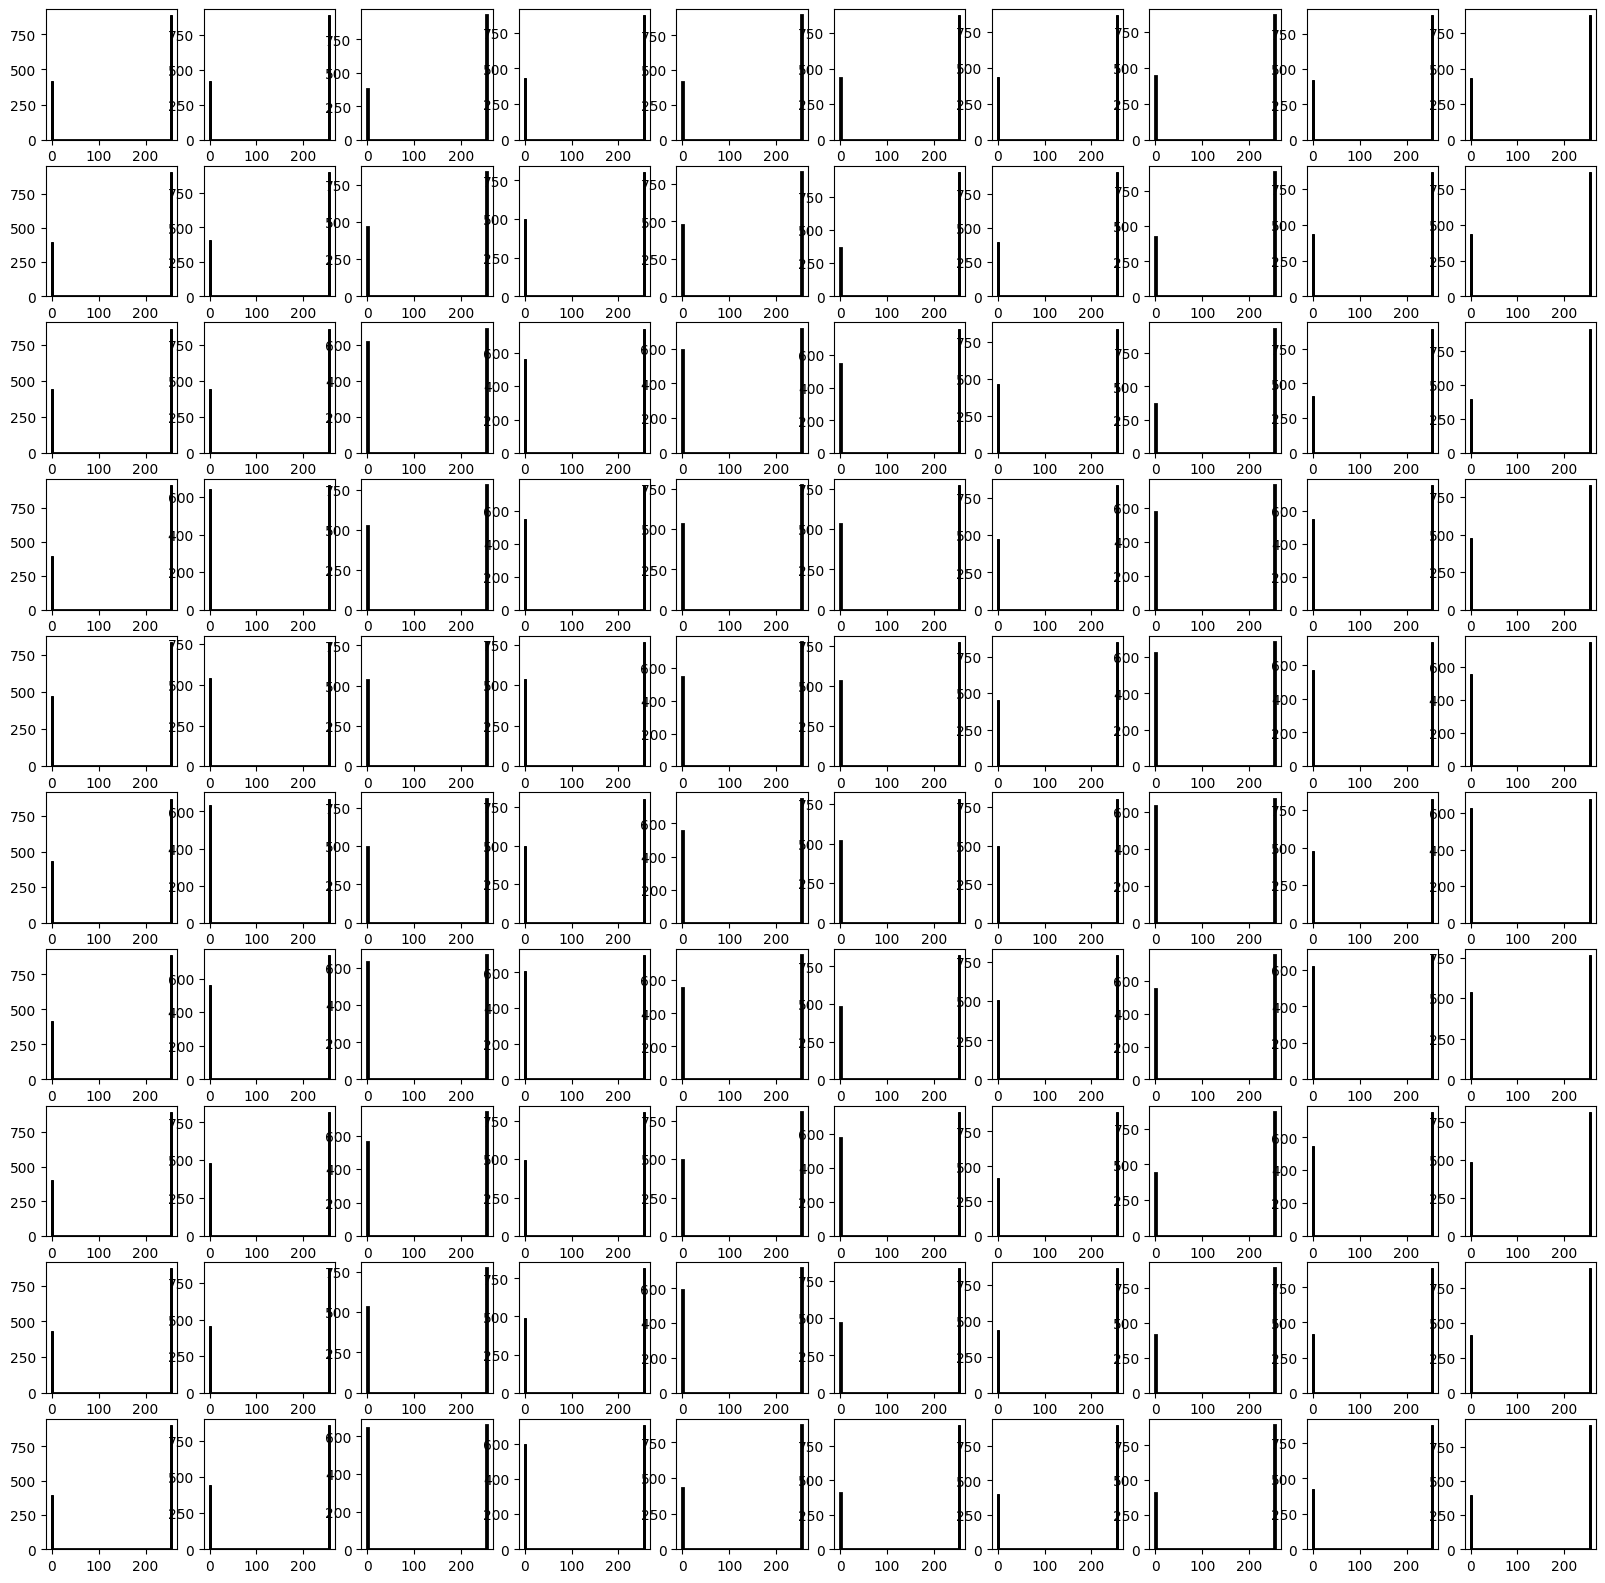

In [78]:
# Define the grid size for dividing the image into sub-images
grid_size = (10, 10)

# Calculate the size of each sub-image
sub_image_size = (image_gray_thresholded.shape[0] // grid_size[0], image_gray_thresholded.shape[1] // grid_size[1])

# Create a figure for the histograms
plt.figure(figsize=(20, 20))

# Loop over the grid
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        # Extract the sub-image
        sub_image = image_gray_thresholded[i*sub_image_size[0]:(i+1)*sub_image_size[0], j*sub_image_size[1]:(j+1)*sub_image_size[1]]
        
        # Create a subplot for the histogram
        plt.subplot(grid_size[0], grid_size[1], i*grid_size[0] + j + 1)
        
        # Plot the histogram of the sub-image
       # Plot the histogram of the sub-image
        plt.hist(sub_image.ravel(), bins=256, color='black', histtype='step', linewidth=2)

# Display the histograms
plt.show()